# 1. Library & Dataset Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("kaggle_boston_price.csv")
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


# 2. EDA(Exploratory Data Analysis : 탐색적 데이터분석)

## 2.1 결측값 확인

In [3]:
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


## 2.2 회귀분석 종속(목표)변수 탐색
- Y : CMEDV 

In [5]:
df["CMEDV"].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

<Axes: >

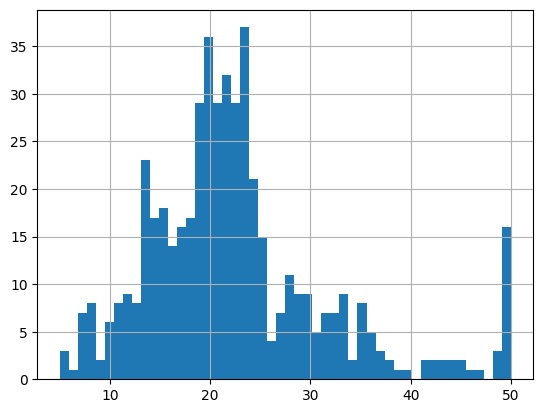

In [6]:
df["CMEDV"].hist(bins=50)

<Axes: >

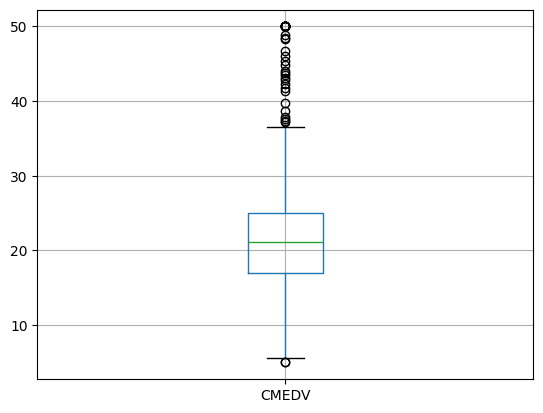

In [7]:
df.boxplot(column=["CMEDV"])

## 2-3. 회귀분석 독립(설명)변수 탐색

In [8]:
df.columns

Index(['TOWN', 'LON', 'LAT', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
numerical_cols = df.columns[4:]
numerical_cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

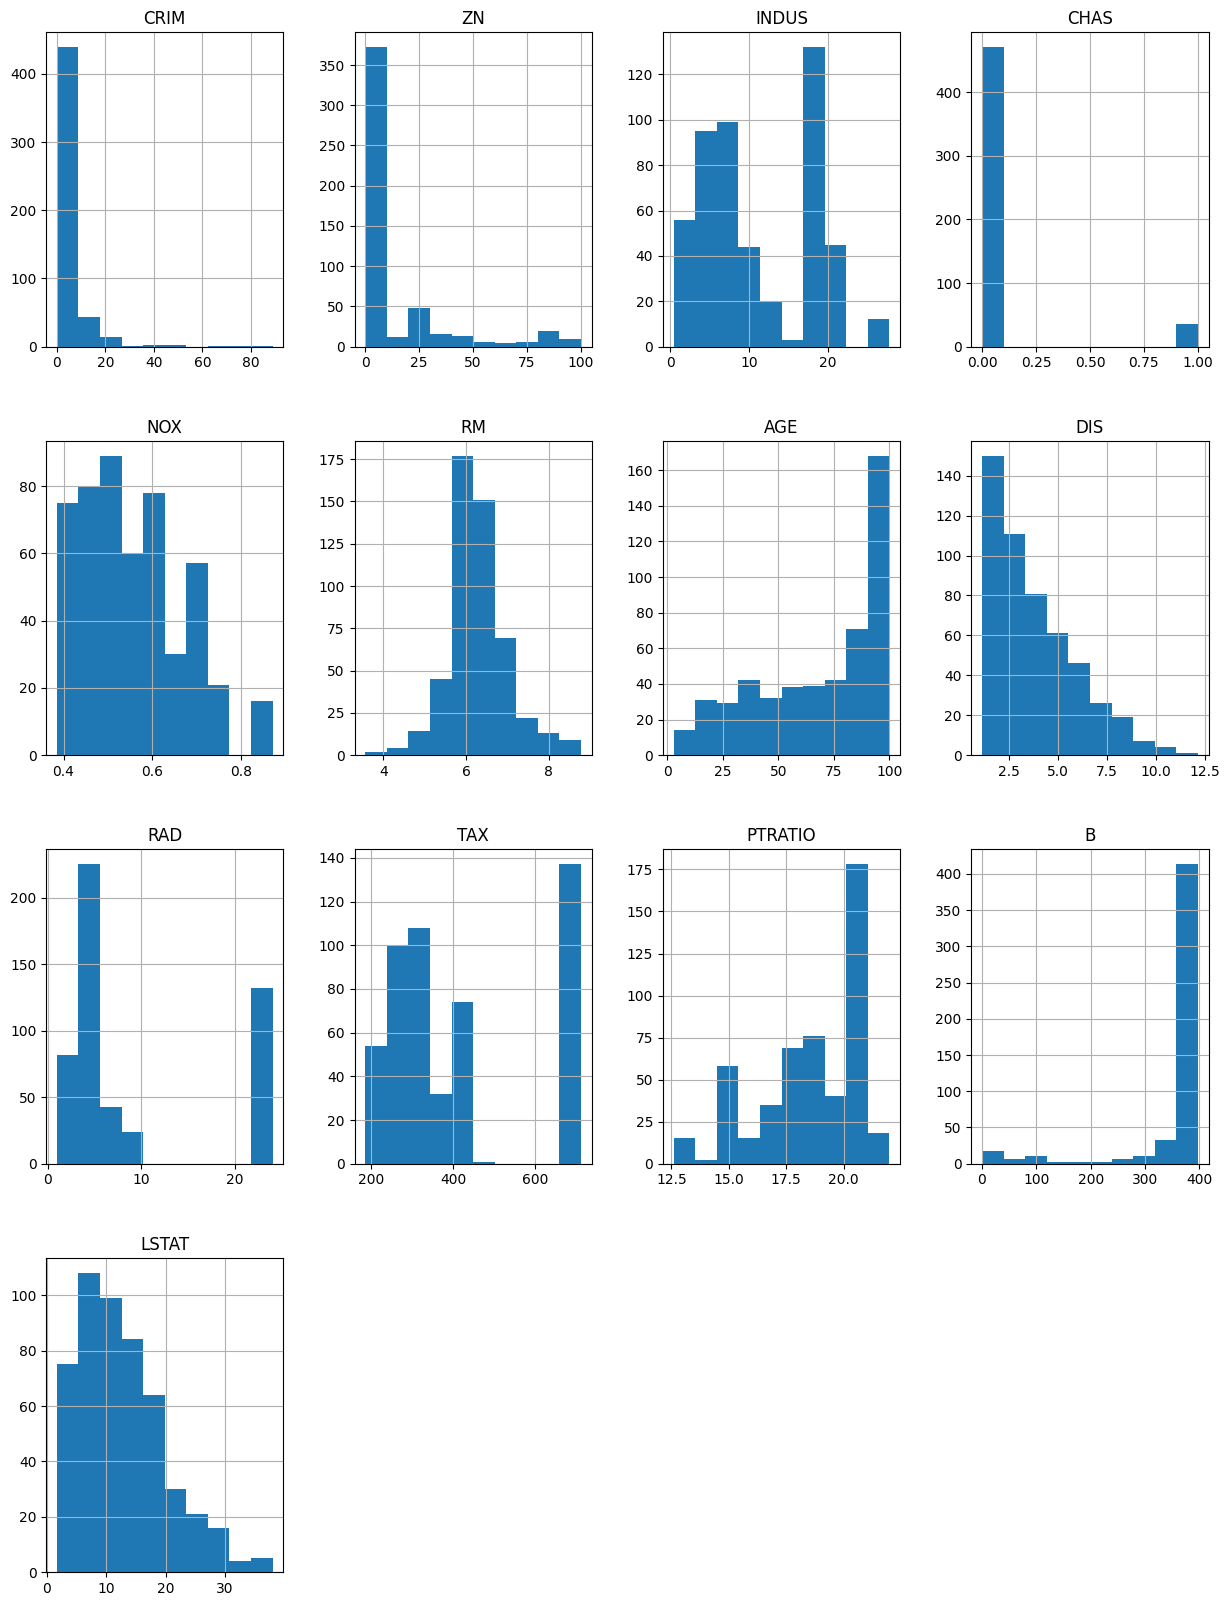

In [10]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
df[numerical_cols].hist(ax=ax)
plt.show()

- 설명변수들의 상관관계 분석
    - Y값과 상관성이 높은 변수들을 선별

In [11]:
df.columns

Index(['TOWN', 'LON', 'LAT', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [13]:
cols = list(df.columns[3:])
corr = df.loc[:,cols].corr(method="pearson")
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


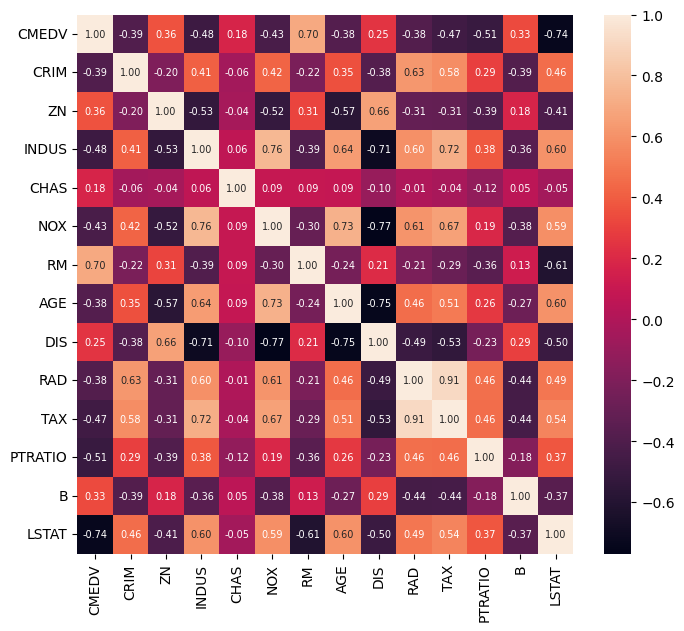

In [19]:
plt.figure(figsize=(8, 7))

sns.heatmap(corr.values, 
            annot=True,
            fmt='.2f',
            annot_kws={"size":7},
            yticklabels=cols,
            xticklabels=cols)
plt.show()

- 설명변수(RM)와 종속변수(CMEDV)의 관계를 탐색

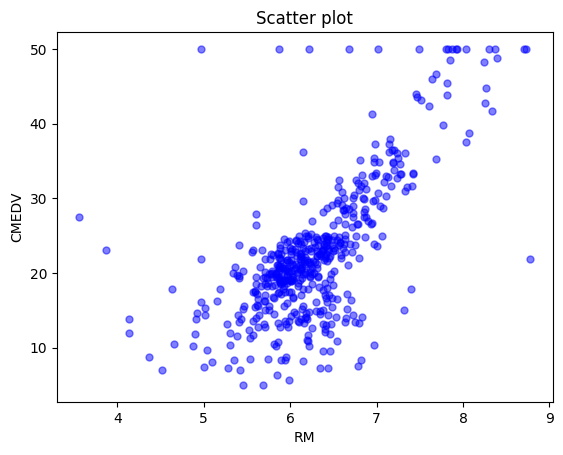

In [22]:
plt.plot("RM", "CMEDV",
         linestyle="none",
         data=df,
         marker='o',
         markersize=5, 
         color='blue',
         alpha=0.5)
plt.title("Scatter plot")
plt.xlabel("RM")
plt.ylabel("CMEDV")
plt.show()

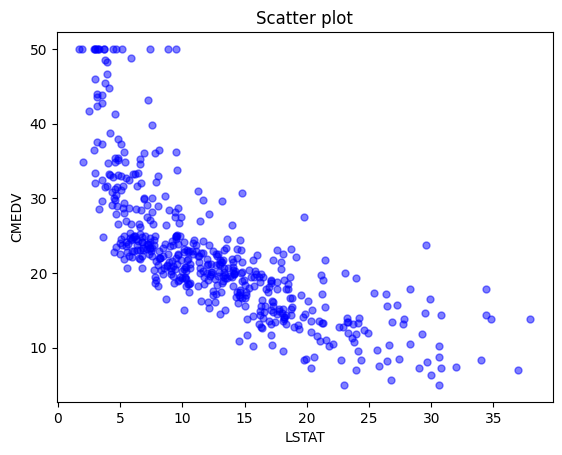

In [23]:
plt.plot("LSTAT", "CMEDV",
         linestyle="none",
         data=df,
         marker='o',
         markersize=5, 
         color='blue',
         alpha=0.5)
plt.title("Scatter plot")
plt.xlabel("LSTAT")
plt.ylabel("CMEDV")
plt.show()

- 지역별 차이 탐색

In [24]:
df["TOWN"].value_counts()

TOWN
Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Duxbury               1
Hull                  1
Hanover               1
Norwell               1
Cohasset              1
Name: count, Length: 92, dtype: int64

<Axes: >

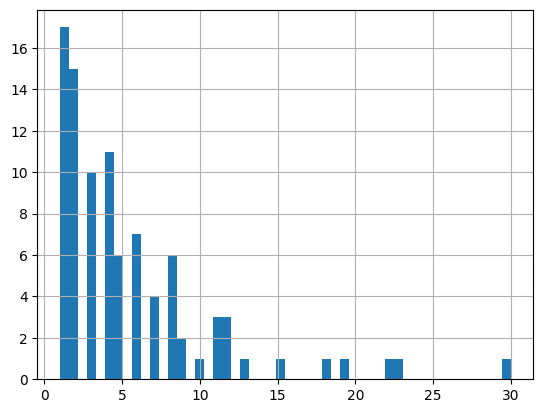

In [25]:
df["TOWN"].value_counts().hist(bins=50)

- 지역별로 집값의 변화가 있는지가 궁금하다면?

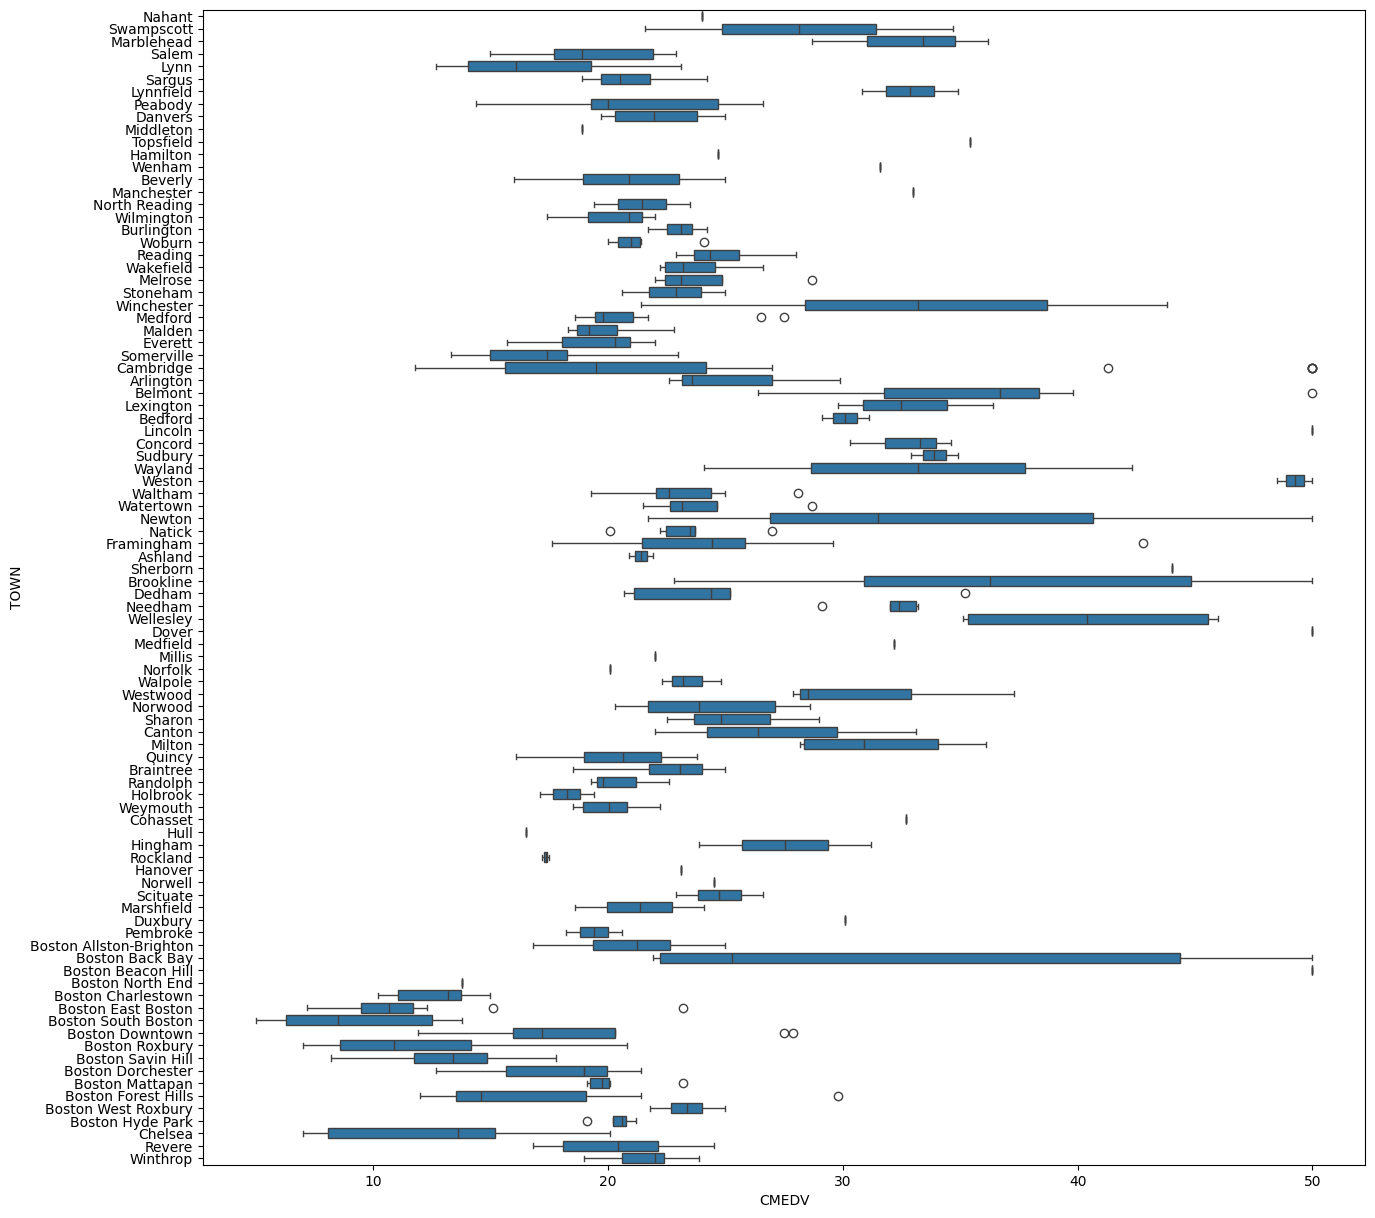

In [34]:
plt.figure(figsize=(15,15))
sns.boxplot(x="CMEDV", y="TOWN", data=df)
plt.show()

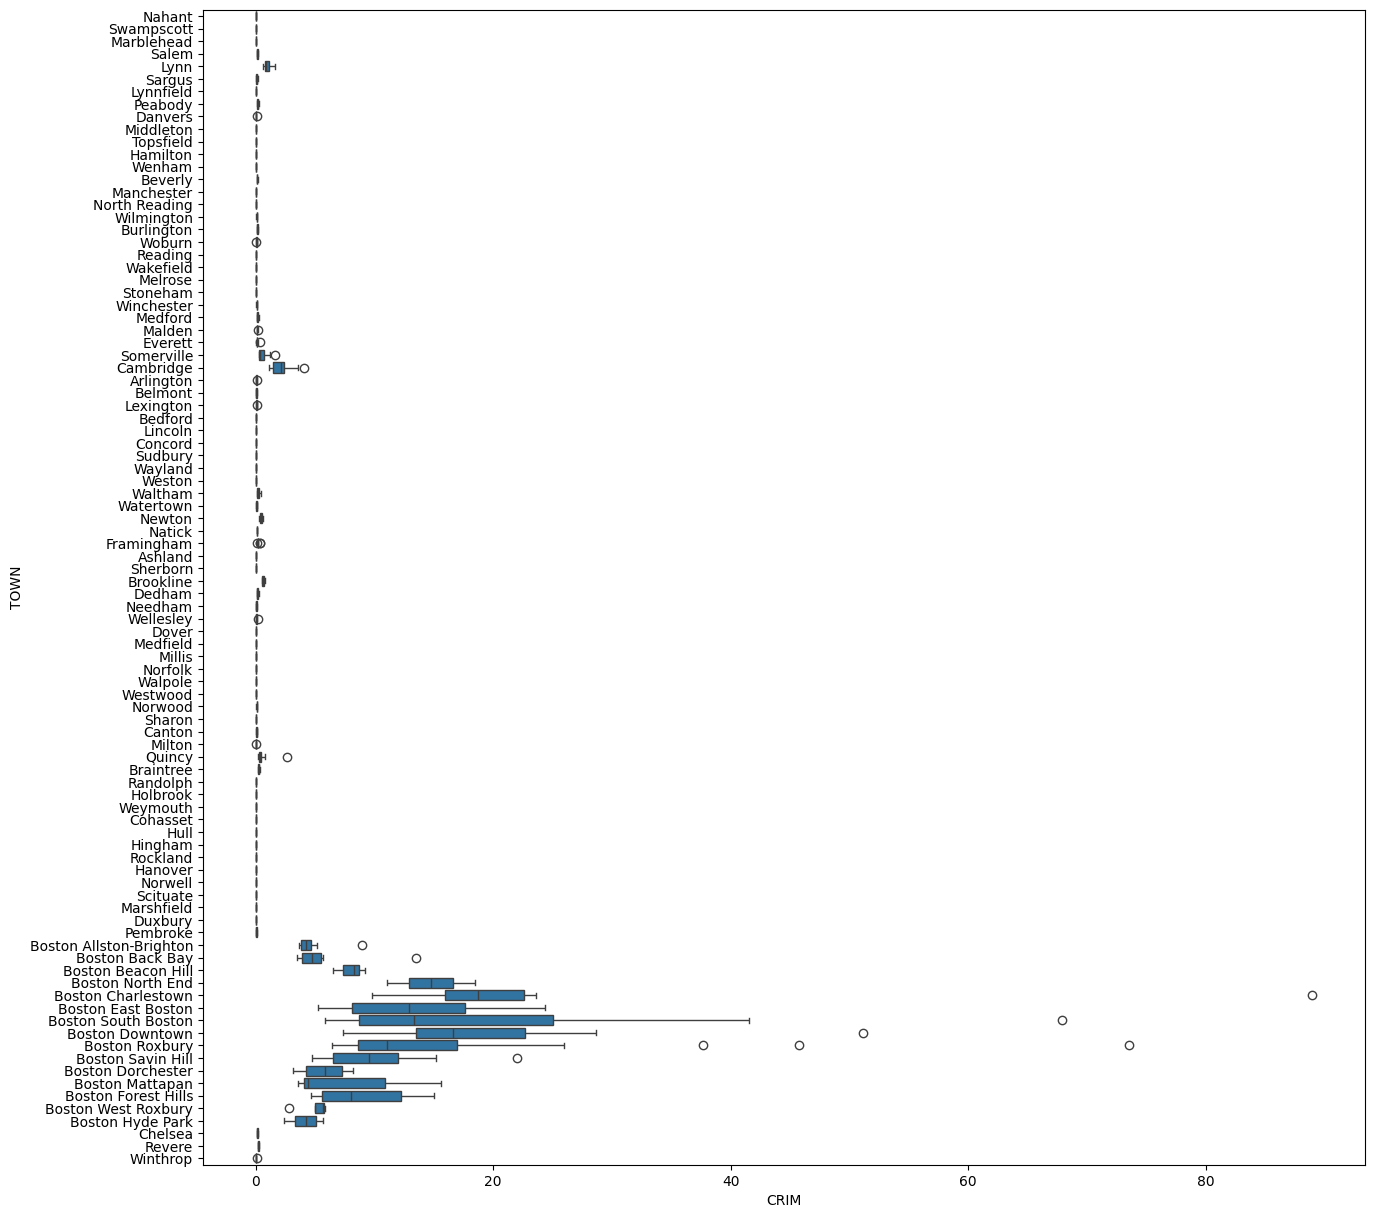

In [35]:
plt.figure(figsize=(15,15))
sns.boxplot(x="CRIM", y="TOWN", data=df)
plt.show()

# 3. 집값 예측 분석 : 회귀분석
- 데이터 전처리
    - Scaling
    - Train / Test Dataset 분리
- Model 학습
- 학습결과 해석
    - R2 Score, RMSE, MAE 출력/해석
    - Feature 유의성 검증(통계모형 Summary 출력/해석)
        - 다중공선성 확인
        - 해석된 결과를 가지고, ML Model 재학습


In [37]:
# CRIM ~ LSTAT ==> z-scaling
from sklearn.preprocessing import StandardScaler

# feature standardization
scaler = StandardScaler()
scale_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scale_columns] = scaler.fit_transform(df[scale_columns])
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.950,42.2875,21.6,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.936,42.2830,34.7,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.928,42.2930,33.4,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.922,42.2980,36.2,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [38]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

X = df[scale_columns]
y = df['CMEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)


In [40]:
# 회귀모델 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
# print coef
print(lr.coef_)

[-1.14250958  1.15545551  0.17117707 -1.6991131   2.83822143 -0.07768083
 -3.3783664   3.24018142 -2.76952768 -2.09290256  0.65665    -4.03364773]


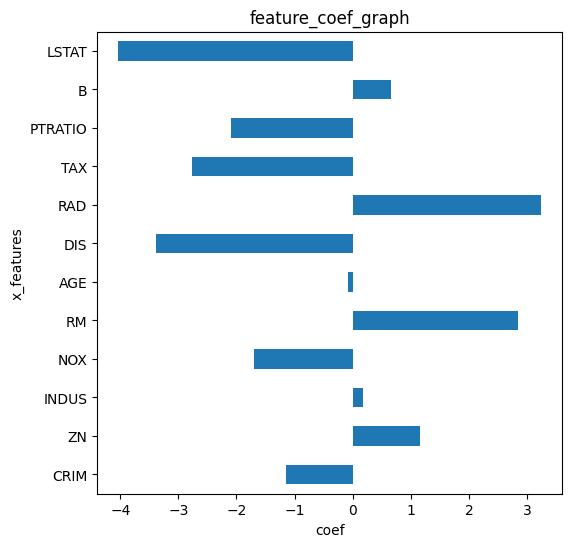

In [43]:
# figure size
#plt.rcParams['figure.figsize'] = [12, 16]
plt.figure(figsize=(6, 6))

# graph values
coefs = lr.coef_.tolist()
coefs_series = pd.Series(coefs)

# graph info
x_labels = scale_columns
ax = coefs_series.plot.barh()
ax.set_title('feature_coef_graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

In [45]:
#학습결과 해석
# print r2 score
from sklearn import metrics

print(lr.score(X_train, y_train)) #acc
print(lr.score(X_test, y_test))

# print mse
y_predictions = lr.predict(X_test)
print("MSE", metrics.mean_squared_error(y_test, y_predictions))
print("RMSE",metrics.root_mean_squared_error(y_test, y_predictions))
print("MAE",metrics.mean_absolute_error(y_test, y_predictions))


0.7501408370395186
0.6933740722647501
MSE 22.06445510690127
RMSE 4.697281672084533
MAE 3.4662564229408885


In [46]:
# 피처 유의성 검정
import statsmodels.api as sm

X_train = sm.add_constant(X_train) #b0
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     85.31
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           6.37e-95
Time:                        11:51:43   Log-Likelihood:                -1051.0
No. Observations:                 354   AIC:                             2128.
Df Residuals:                     341   BIC:                             2178.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5175      0.258     87.397      0.000      22.011      23.024
CRIM          -1.1425      0.338     -3.380      0.001      -1.807      -0.478
ZN             1.1555      0.376      3.075      0.002       0.416       1.895
INDUS          0.1712      0.496      0.345      0.730      -0.805       1.148
NOX           -1.6991      0.556     -3.054      0.002      -2.794      -0.605
RM             2.8382      0.346      8.198      0.000       2.157       3.519
AGE           -0.0777      0.444     -0.175      0.861      -0.950       0.795
DIS           -3.3784      0.522     -6.475      0.000      -4.405      -2.352
RAD            3.2402      0.725      4.471      0.000       1.815       4.666
TAX           -2.7695      0.788     -3.512      0.001      -4.320      -1.219
PTRATIO       -2.0929      0.333     -6.285      0.000      -2.748      -1.438
B              0.6566      0.326      2.014      0.045       0.015       1.298
LSTAT         -4.0336      0.427     -9.450      0.000      -4.873      -3.194
==============================================================================
Omnibus:                      153.017   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.488
Skew:                           1.813   Prob(JB):                    2.38e-159
Kurtosis:                       9.031   Cond. No.                         9.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# 다중공선성 확인(VIF : 1~ 5, 6~10 : 후보군, 11~ : 다중공선성발생)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.0,const
1,1.8,CRIM
2,2.2,ZN
3,3.6,INDUS
4,4.4,NOX
5,1.9,RM
6,3.0,AGE
7,3.9,DIS
8,7.2,RAD
9,8.7,TAX


## 3.1 집값 예측 분석 : 릿지(L2-Norm) 회귀실습

In [109]:
from sklearn.linear_model import Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# 하이퍼파라미터 알파값 초기화
alpha = 2.0

# Ridge Class Object 생성(깡통모델 만들기)
ridge = Ridge(alpha=alpha)

# 학습
ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

In [110]:
y_pred = ridge.predict(X_test)

#모델검증
print(ridge.score(X_train, y_train)) #acc
print(ridge.score(X_test, y_test))

# print mse
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE",metrics.root_mean_squared_error(y_test, y_pred))
print("MAE",metrics.mean_absolute_error(y_test, y_pred))

0.7426116419250488
0.7209378897267822
MSE 24.193415266737503
RMSE 4.918680236276546
MAE 3.4869984449828944


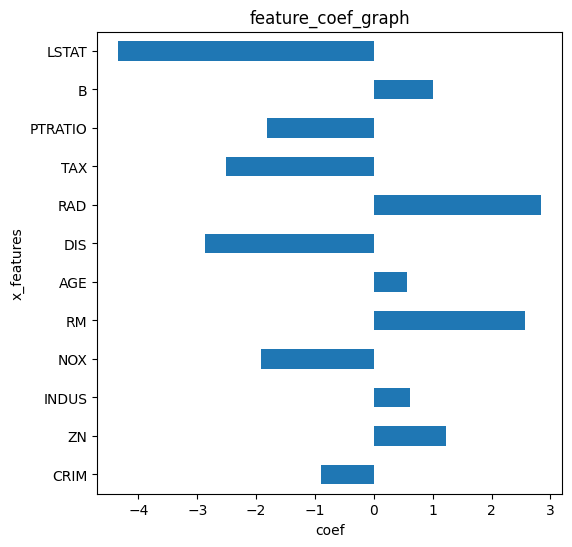

In [111]:
plt.figure(figsize=(6, 6))

# graph values
coefs = ridge.coef_.tolist()
coefs_series = pd.Series(coefs)

# graph info
x_labels = scale_columns
ax = coefs_series.plot.barh()
ax.set_title('feature_coef_graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

## 3.2 집값 예측분석 : 라쏘(L1-Norm) 회귀실습

0.744663196609994
0.6955142146188797
MSE 21.910452882614997
RMSE 4.680860271639712
MAE 3.332951679260436


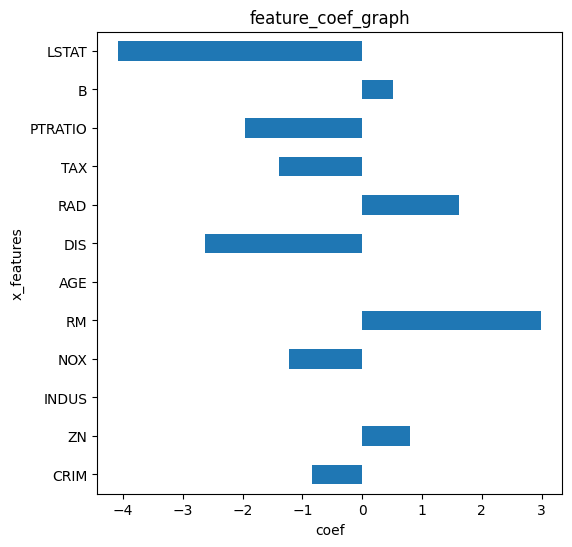

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)
# 하이퍼파라미터 알파값 초기화
alpha = 0.1
# Lasso Class Object 생성(깡통모델 만들기)
lasso = Lasso(alpha=alpha)
# 학습
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

#모델검증
print(lasso.score(X_train, y_train)) #acc
print(lasso.score(X_test, y_test))
# print mse
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE",metrics.root_mean_squared_error(y_test, y_pred))
print("MAE",metrics.mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(6, 6))
# graph values
coefs = lasso.coef_.tolist()
coefs_series = pd.Series(coefs)

# graph info
x_labels = scale_columns
ax = coefs_series.plot.barh()
ax.set_title('feature_coef_graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()